In [1]:
%cd '/content/drive/MyDrive/archive'

/content/drive/MyDrive/archive


In [2]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from helper import plot_permute_importance, plot_feature_importance
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from prettytable import PrettyTable

%matplotlib inline


In [3]:
#Reading .csv files

df19 = pd.read_csv('players_19.csv')
df20 = pd.read_csv('players_20.csv')


In [4]:
#Getting a view of the players_19 dataframe

df19.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

In [5]:
#Range of overall skill (The predictor variable)

print(f'The minimum overall skill value is {min(df19.overall.values)} and the maximum is {max(df19.overall.values)}')

The minimum overall skill value is 47 and the maximum is 94


**Preprocessing**

1. Checking datatype of column values in a dataframe

In [6]:
print("The datatypes of columns in the dataframe are: ")
print(df19.dtypes)

The datatypes of columns in the dataframe are: 
sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
te

2. Checking the null values count

In [7]:
#Checking null/NA values in columns
print(f'The percentage of null/NA values per column in a dataframe  is (%): \n')
 
columns = ["Columns", "Percentage (%)"]
  
myTable = PrettyTable()
sum=[]
col_int=[]
# Add Columns

for i in df19.columns:
  # if df19[i].dtypes !=object:
    sum.append(round(df19[i]. isnull(). sum()/len(df19)*100, 2))
    col_int.append(i)
myTable.add_column(columns[0], col_int)
myTable.add_column(columns[1], sum)
print(myTable)

The percentage of null/NA values per column in a dataframe  is (%): 

+----------------------------+----------------+
|          Columns           | Percentage (%) |
+----------------------------+----------------+
|         sofifa_id          |      0.0       |
|         player_url         |      0.0       |
|         short_name         |      0.0       |
|         long_name          |      0.0       |
|            age             |      0.0       |
|            dob             |      0.0       |
|         height_cm          |      0.0       |
|         weight_kg          |      0.0       |
|        nationality         |      0.0       |
|            club            |      0.0       |
|          overall           |      0.0       |
|         potential          |      0.0       |
|         value_eur          |      0.0       |
|          wage_eur          |      0.0       |
|      player_positions      |      0.0       |
|       preferred_foot       |      0.0       |
|  international_r

Therefore, clearly columns having null values greater that 50 % shall be dropped as they don't have sufficient information to train the model. So, as per the null values count above, the feature columns dropped are:


1.   nation_jersey_number 
2.   gk_diving 
3.   gk_handling
4.   gk_kicking
5.   gk_reflexes 
6.   gk_speed  
7.   gk_positioning 
8.   player_traits
9.   player_tags
10.  loaned_from
11.  nation_position





In [8]:
#Dropping Feature columns
df19.drop(columns=["nation_jersey_number","gk_diving","gk_handling","gk_kicking","gk_reflexes","gk_speed","gk_positioning", "player_traits","player_tags","loaned_from", "nation_position"], inplace=True)

The $player$ _$positions$ column contains multiple postions for a several players. So we have tried to one hot encode it manually by creating separate rows for positions and then assigning a count for the number of positions respective to the player

In [4]:
# Encoding player position column

# Code to get unique positions in the column
pos=[];
for j in range(len(df19)):
    
     val = df19["player_positions"].values[j]
     #Checking whether the string has '+'sign between numbers and add them accordingly
     if (val.count(',')>=1): 
      ct = val.count(',')
      for k in range(ct):
          str_ = val.split(",")[k]
          pos.append(str_.strip())
     else:
          str_ = val
          pos.append(str_)
pos=list(set(pos))

#Creating a dataframe with columns equal to number of unique positions
df = pd.DataFrame(columns=pos)

In [5]:
# Keeping a count of multiple positions for different players

for j in range(len(df19)):
     val = df19["player_positions"].values[j]  
     
     #Checking whether the string has ','sign between numbers and add them accordingly
     if (val.count(',')>=1): 
      ct = val.count(',')
      for k in range(ct):
          
          str_ = val.split(",")[k].strip()
          if str_ in pos:
            df.loc[j,str_]=1
          else:
            df.loc[j,str_]=0
          
     else:
       if val in pos:
         df.loc[j,val]=1 
       else:
         df.loc[j,val]=0
        

In [6]:
# Filling the na values with 0
df.fillna(0, inplace=True) 
df.head(20)

#Concatenating player positions dataframe with the original one
df19 = pd.concat([df19, df], axis=1)

# Dropping player position column 
df19.drop(columns=["player_positions"], inplace=True)
df19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,LWB,CB,LB,ST,GK,CF,RB,CDM,RWB,LW,LM,RM,RW,CAM,CM
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manche

3. Preprocessing columns of 'object' type

From columns $attacking$_$crossing$ to $rb$, we have numbers like '98+2', '76-2', etc. in the from of strings, so we have calculated their value based on sign and converted them to float for further processing

In [7]:
# Dealing with columns from "attacking_crossing" to "rb"

for i in range (list(df19.columns).index("attacking_crossing"),list(df19.columns).index("rb")+1 ):
  
   sum=[]
   for j in range(len(df19)):
    #Checking whether the datatype is not int/float of any single value 
    if type(df19[df19.columns[i]].values[j])!=float and type(df19[df19.columns[i]].values[j])!= int: 
     
     #Checking whether the string has '+'sign between numbers and add them accordingly
     if (df19[df19.columns[i]].values[j].count('+')==1): 
      sum.append(float(df19[df19.columns[i]].values[j].split("+")[0]) + float(df19[df19.columns[i]].values[j].split("+")[1]))

     #Checking whether the string has '-'sign between numbers and subtract them accordingly 
     elif (df19[df19.columns[i]].values[j].count('-')==1):
      sum.append(float(df19[df19.columns[i]].values[j].split("-")[0]) - float(df19[df19.columns[i]].values[j].split("-")[1]))

     #Retaining all other values as it is 
     else:
      sum.append(float(df19[df19.columns[i]].values[j]))

    else:
      sum.append(df19[df19.columns[i]].values[j])
   df19[df19.columns[i]] =sum

   #Filling all the columns' NA values with 0.0
   df19[df19.columns[i]]= df19[df19.columns[i]].fillna(0.0)

Text(0.5, 1.0, 'Correlation of overall with columns ranging from attacking_crossing to rb')

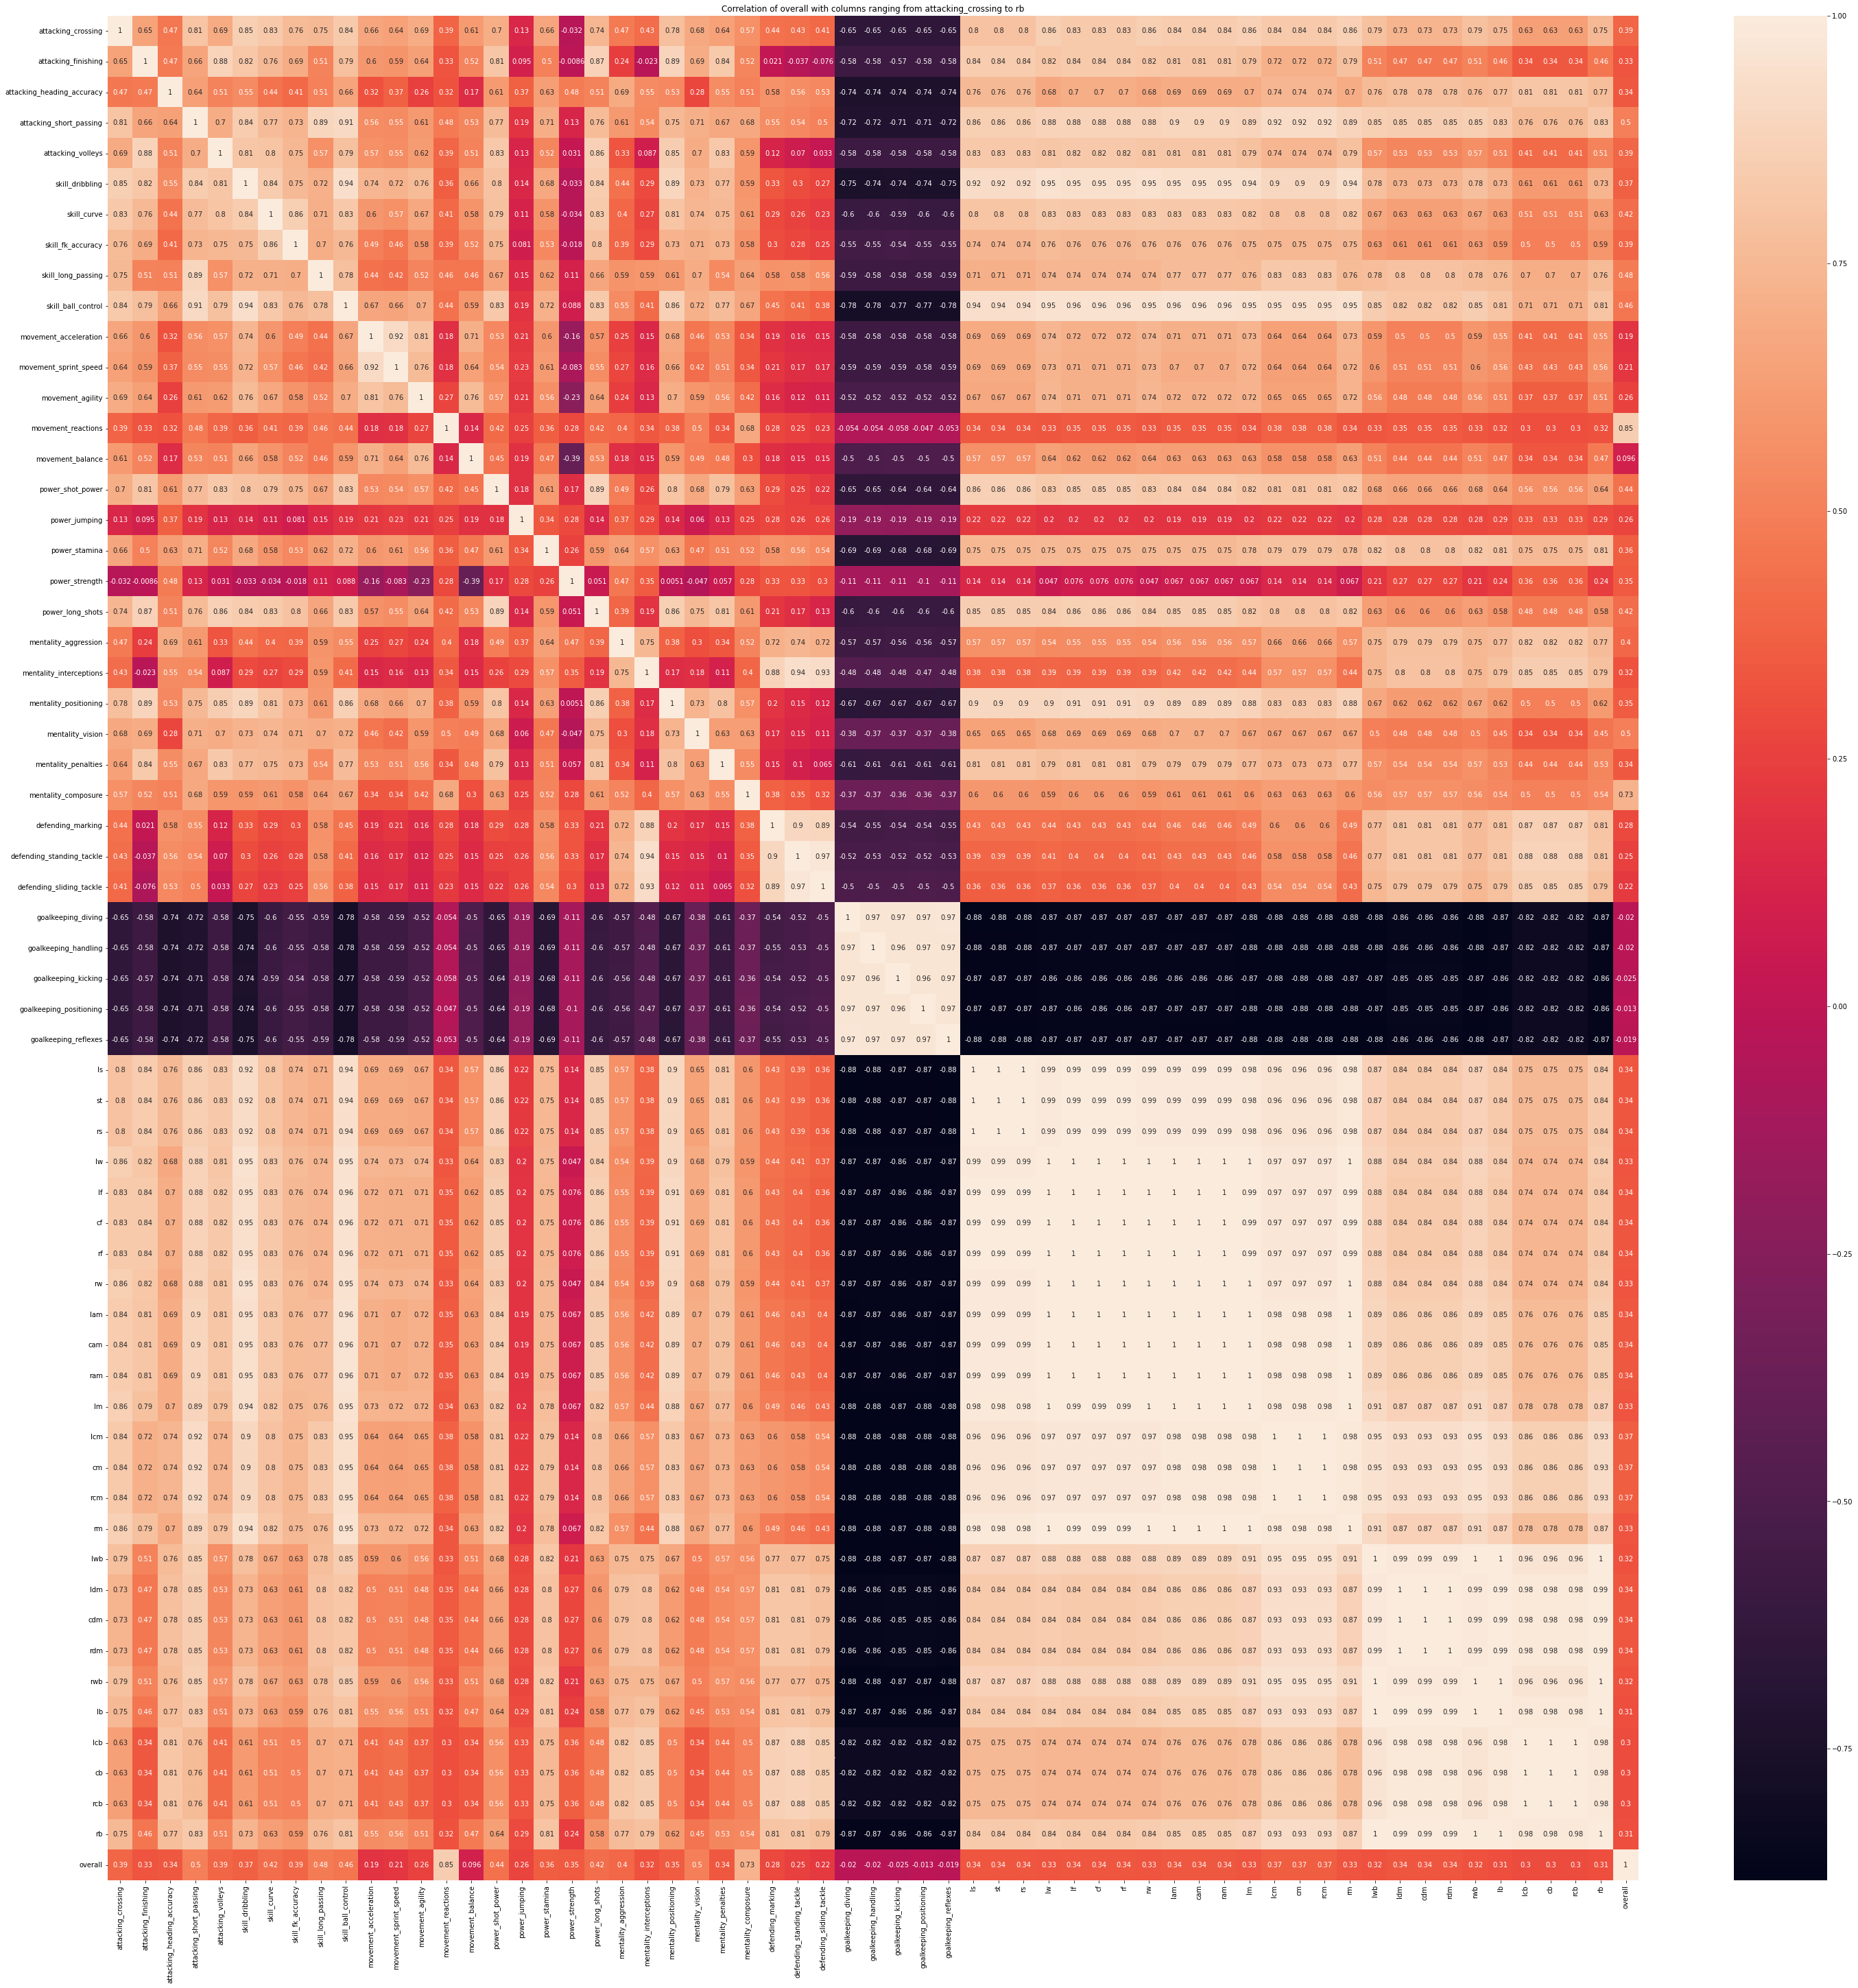

In [13]:
#Viewing heatmap for dataframe
df = pd.DataFrame()
for i in range (list(df19.columns).index("attacking_crossing"),list(df19.columns).index("rb")+1 ):
  df[df19.columns[i]] = df19[df19.columns[i]]
df["overall"] = df19["overall"]
fig,ax= plt.subplots(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
ax.set_title("Correlation of overall with columns ranging from attacking_crossing to rb")

From the heatmap correlation values in the above plot, it is very clear to see which features are having better correlation with the response variable. We have kept a $threshold$ of 0.4 to filter feature columns for our model training. So columns having correlation greater than 0.4 are following:

1. skill_curve
2. skill_long_passing
3. skill_ball_control
4. movement_reactions
5. power_shot_power
6. power_long_shots
7. mentality_aggression
8. mentality_vision
9. mentality_composure
10. attacking_short_passing




We are still left with columns like pace, shooting, passing, dribbling, defending and physic which consists of NA values, so let us fill all the NA values with NA

In [8]:
#Filling null values with 0

for i in range (list(df19.columns).index("pace"),list(df19.columns).index("release_clause_eur")+1 ):
  df19[df19.columns[i]] = df19[df19.columns[i]].fillna(0.0)

Text(0.5, 1.0, 'Correlation of Overall value with physical attributes')

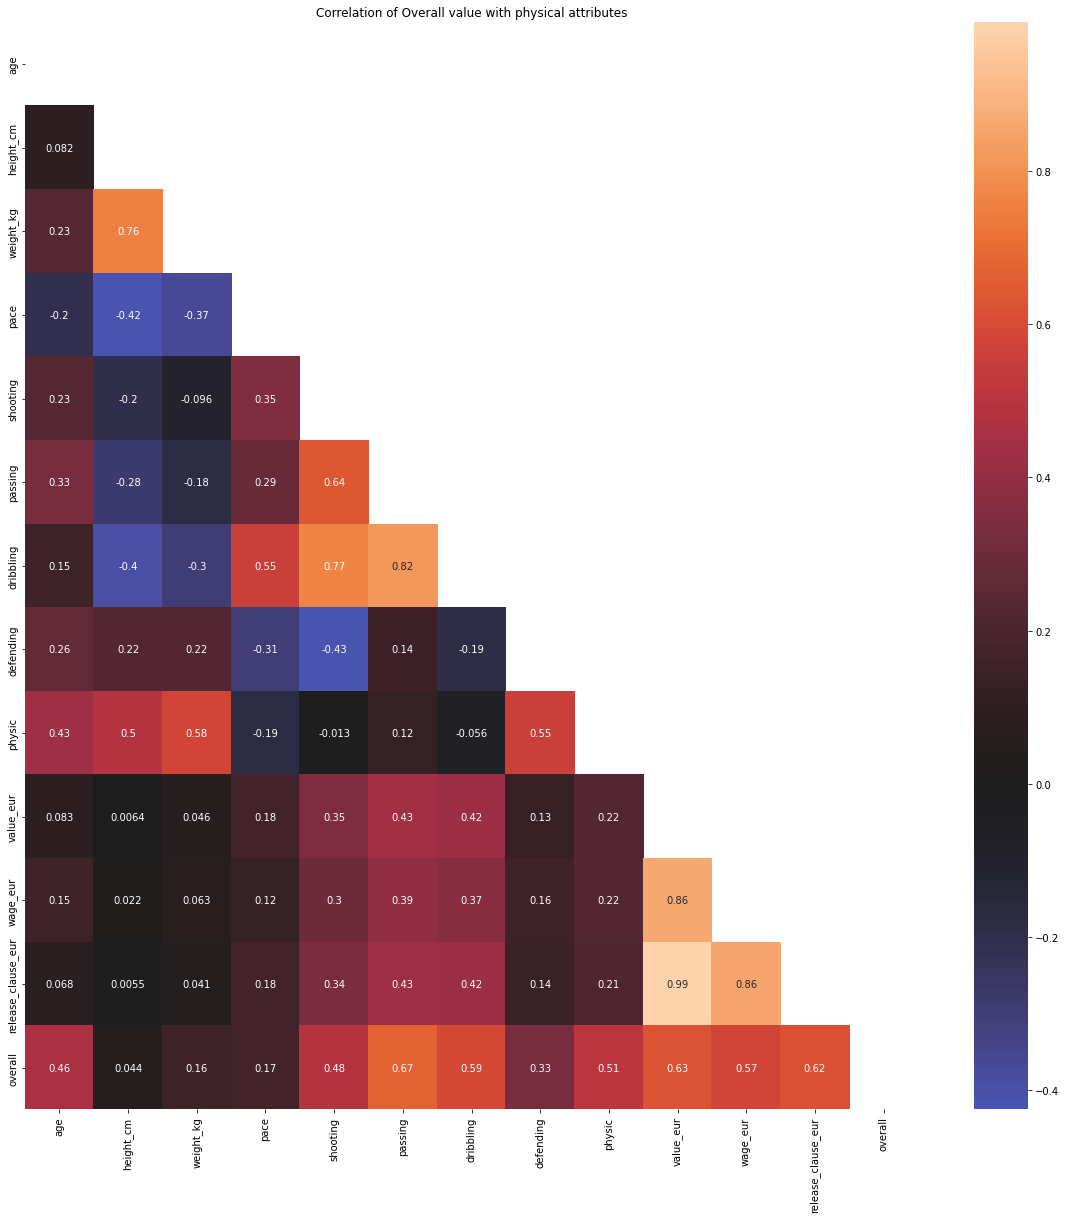

In [15]:
#Heatmap with physical attributes

fig,ax= plt.subplots(figsize=(20,20))
df_corr= df19[["age","height_cm","weight_kg","pace","shooting","passing","dribbling","defending","physic","value_eur","wage_eur","release_clause_eur", "overall"]] 
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))
ax =sns.heatmap(df_corr.corr(), annot=True, center=0, mask=mask)
ax.set_title("Correlation of Overall value with physical attributes")
# ax = sns.heatmap(df_corr, vmin=0, vmax=1)

From the heatmap correlation values in the above plot, it is very clear to see which features are having better correlation with the response variable. We have kept a $threshold$ of 0.4 to filter feature columns for our model training. So columns having correlation greater than 0.4 are following:

1. age
2. value_eur
3. wage_eur
4. release_clause_eur


Text(0.5, 0.98, 'Trend visualisation of the predictiors with overall response variable')

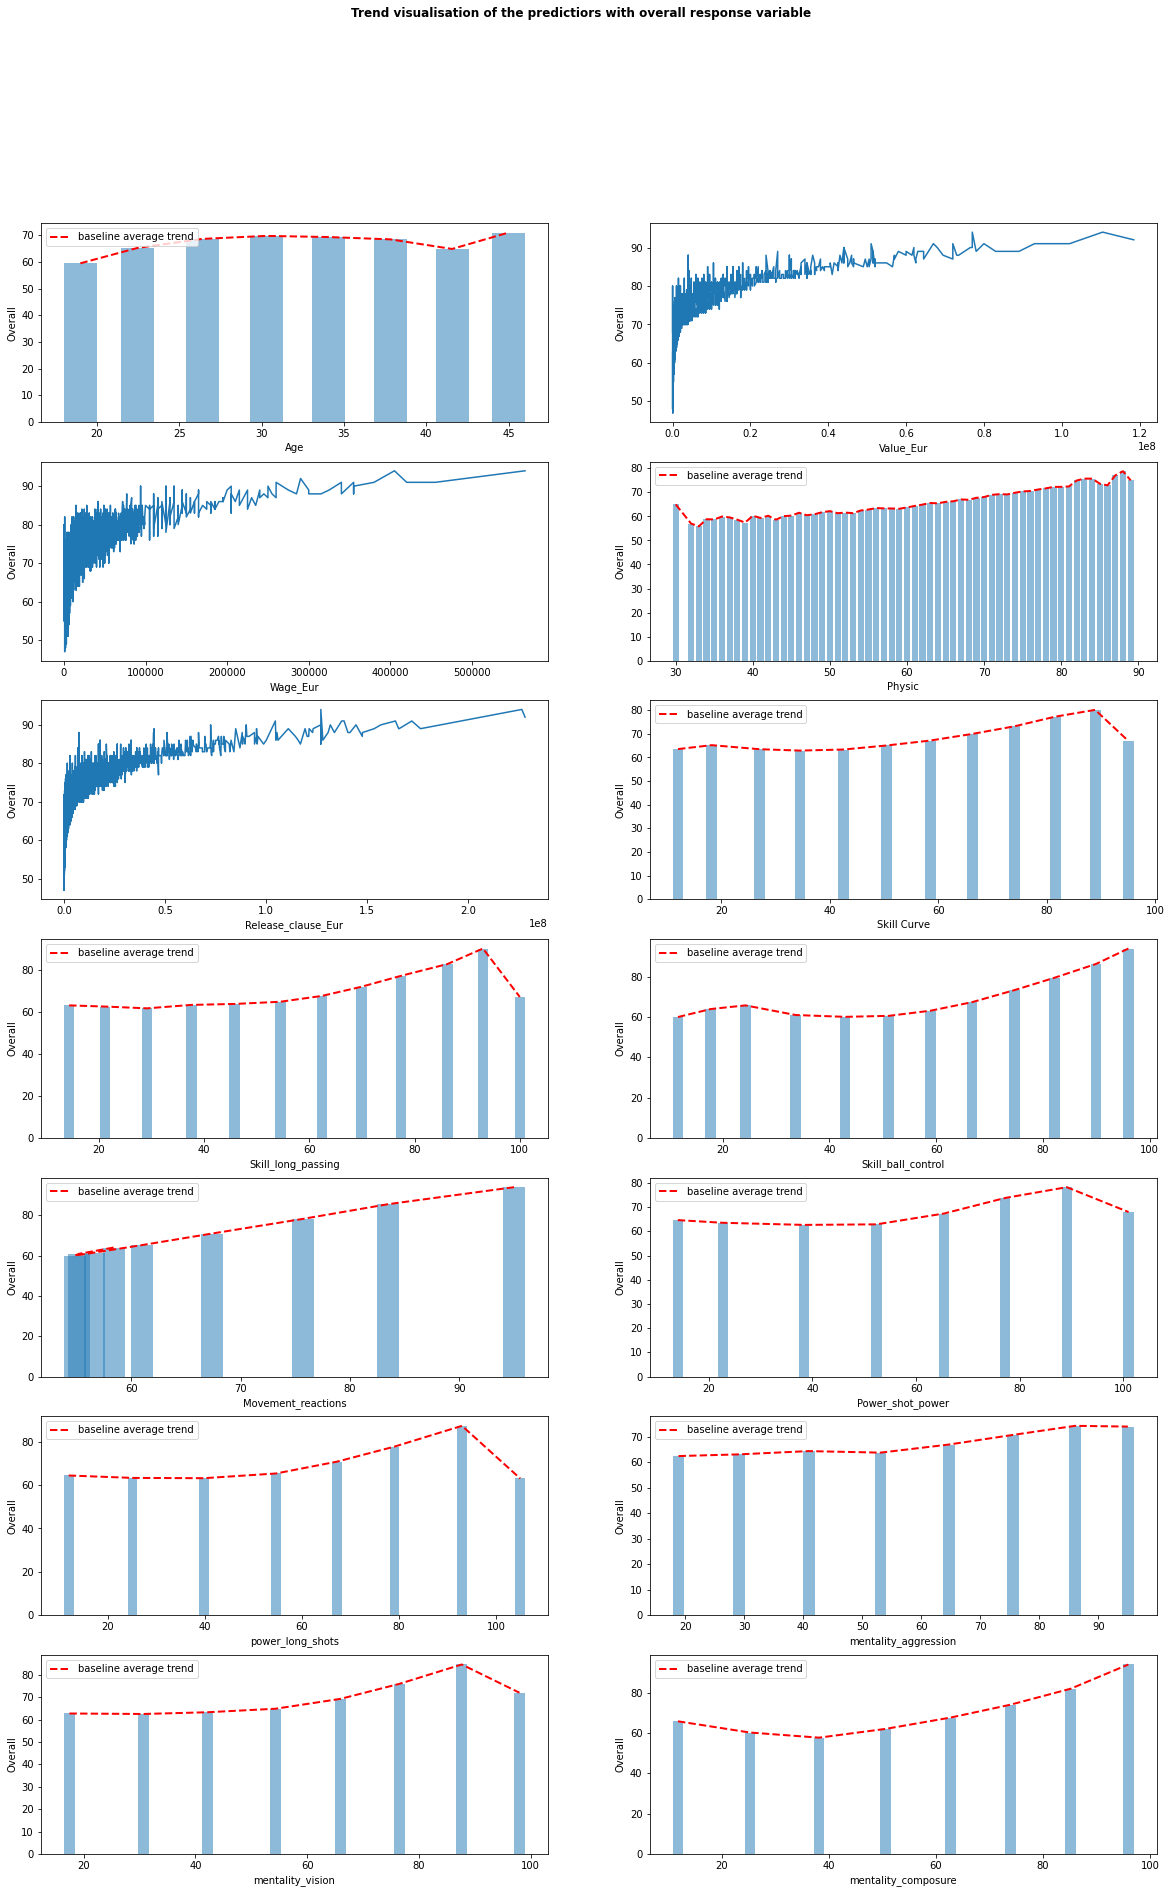

In [16]:

# Visual analysis through graphs of the feature columns processed so far


fig, ax = plt.subplots(7,2,figsize=(20,30))
ax =ax.ravel()
#Relationship with age

age_bins = np.linspace(df19["age"].min(), df19["age"].max(), 8)
age_group = df19.groupby(by=np.digitize(df19["age"], age_bins)).mean()
ax[0].plot(age_group['age'], age_group['overall'], 'r--', linewidth=2, label='baseline average trend')
ax[0].bar(age_group['age'], age_group['overall'],width = 2, alpha=0.5)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Overall')
ax[0].legend(frameon=True, loc='topright')

#Relationship with value_eur
idx = np.argsort(df19.value_eur.values)
values = df19.value_eur[idx].values
overall = df19.overall[idx].values
ax[1].plot(values, overall)
ax[1].set_xlabel('Value_Eur')
ax[1].set_ylabel('Overall')


#Relationship with wage eur
idx = np.argsort(df19.wage_eur.values)
wage = df19.wage_eur[idx].values
overall = df19.overall[idx].values
ax[2].plot(wage, overall)
ax[2].set_xlabel('Wage_Eur')
ax[2].set_ylabel('Overall')


#Relationship with physic
df_foot = df19[["physic", "overall"]].groupby(by="physic").mean()
ax[3].plot(df_foot.index,df_foot, 'r--', linewidth=2, label='baseline average trend')
ax[3].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[3].set_xlabel('Physic')
ax[3].set_ylabel('Overall')
ax[3].legend(frameon=True, loc='topright')

#Relationship with release_clause_eur
idx = np.argsort(df19.release_clause_eur.values)
wage = df19.release_clause_eur[idx].values
overall = df19.overall[idx].values
ax[4].plot(wage, overall)
ax[4].set_xlabel('Release_clause_Eur')
ax[4].set_ylabel('Overall')

#Relationship with skill_curve
skill_bins = np.linspace(df19["skill_curve"].min(), df19["skill_curve"].max(), 12)
skill_group = df19.groupby(by=np.digitize(df19["skill_curve"], skill_bins)).mean()
ax[5].plot(skill_group['skill_curve'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[5].bar(skill_group['skill_curve'], skill_group['overall'],width = 2, alpha=0.5)
ax[5].set_xlabel('Skill Curve')
ax[5].set_ylabel('Overall')
ax[5].legend(frameon=True, loc='topright')

#Relationship with skill_long_passing
skill_bins = np.linspace(df19["skill_long_passing"].min(), df19["skill_long_passing"].max(), 12)
skill_group = df19.groupby(by=np.digitize(df19["skill_long_passing"], skill_bins)).mean()
ax[6].plot(skill_group['skill_long_passing'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[6].bar(skill_group['skill_long_passing'], skill_group['overall'],width = 2, alpha=0.5)
ax[6].set_xlabel('Skill_long_passing')
ax[6].set_ylabel('Overall')
ax[6].legend(frameon=True, loc='topright')

#Relationship with skill_ball_control
skill_bins = np.linspace(df19["skill_ball_control"].min(), df19["skill_ball_control"].max(), 12)
skill_group = df19.groupby(by=np.digitize(df19["skill_ball_control"], skill_bins)).mean()
ax[7].plot(skill_group['skill_ball_control'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[7].bar(skill_group['skill_ball_control'], skill_group['overall'],width = 2, alpha=0.5)
ax[7].set_xlabel('Skill_ball_control')
ax[7].set_ylabel('Overall')
ax[7].legend(frameon=True, loc='topright')

#Relationship with movement_reactions
skill_bins = np.linspace(df19["movement_reactions"].min(), df19["movement_reactions"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["skill_ball_control"], skill_bins)).mean()
ax[8].plot(skill_group['movement_reactions'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[8].bar(skill_group['movement_reactions'], skill_group['overall'],width = 2, alpha=0.5)
ax[8].set_xlabel('Movement_reactions')
ax[8].set_ylabel('Overall')
ax[8].legend(frameon=True, loc='topright')

#Relationship with power_shot_power
skill_bins = np.linspace(df19["power_shot_power"].min(), df19["power_shot_power"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["power_shot_power"], skill_bins)).mean()
ax[9].plot(skill_group['power_shot_power'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[9].bar(skill_group['power_shot_power'], skill_group['overall'],width = 2, alpha=0.5)
ax[9].set_xlabel('Power_shot_power')
ax[9].set_ylabel('Overall')
ax[9].legend(frameon=True, loc='topright')

#Relationship with power_long_shots
skill_bins = np.linspace(df19["power_long_shots"].min(), df19["power_long_shots"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["power_long_shots"], skill_bins)).mean()
ax[10].plot(skill_group['power_long_shots'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[10].bar(skill_group['power_long_shots'], skill_group['overall'],width = 2, alpha=0.5)
ax[10].set_xlabel('power_long_shots')
ax[10].set_ylabel('Overall')
ax[10].legend(frameon=True, loc='topright')

#Relationship with mentality_aggression
skill_bins = np.linspace(df19["mentality_aggression"].min(), df19["mentality_aggression"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["mentality_aggression"], skill_bins)).mean()
ax[11].plot(skill_group['mentality_aggression'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[11].bar(skill_group['mentality_aggression'], skill_group['overall'],width = 2, alpha=0.5)
ax[11].set_xlabel('mentality_aggression')
ax[11].set_ylabel('Overall')
ax[11].legend(frameon=True, loc='topright')

#Relationship with mentality_vision
skill_bins = np.linspace(df19["mentality_vision"].min(), df19["mentality_vision"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["mentality_vision"], skill_bins)).mean()
ax[12].plot(skill_group['mentality_vision'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[12].bar(skill_group['mentality_vision'], skill_group['overall'],width = 2, alpha=0.5)
ax[12].set_xlabel('mentality_vision')
ax[12].set_ylabel('Overall')
ax[12].legend(frameon=True, loc='topright')

#Relationship with mentality_composure
skill_bins = np.linspace(df19["mentality_composure"].min(), df19["mentality_composure"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["mentality_composure"], skill_bins)).mean()
ax[13].plot(skill_group['mentality_composure'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[13].bar(skill_group['mentality_composure'], skill_group['overall'],width = 2, alpha=0.5)
ax[13].set_xlabel('mentality_composure')
ax[13].set_ylabel('Overall')
ax[13].legend(frameon=True, loc='topright')

fig.suptitle("Trend visualisation of the predictiors with overall response variable", fontweight='bold')


There are several $categorical$ variables in this dataframe which are as follows:
1. preferred_foot
2. international_reputation
3. weak_foot
4. skill_moves
5. contract_valid_until
6. team_jersey_number
7. nation_jersey_number
8. nationality 
9. club
10. Team position
  
Here, international_reputation, 
Let us try to visualise these features through graph before employing any type of encoding

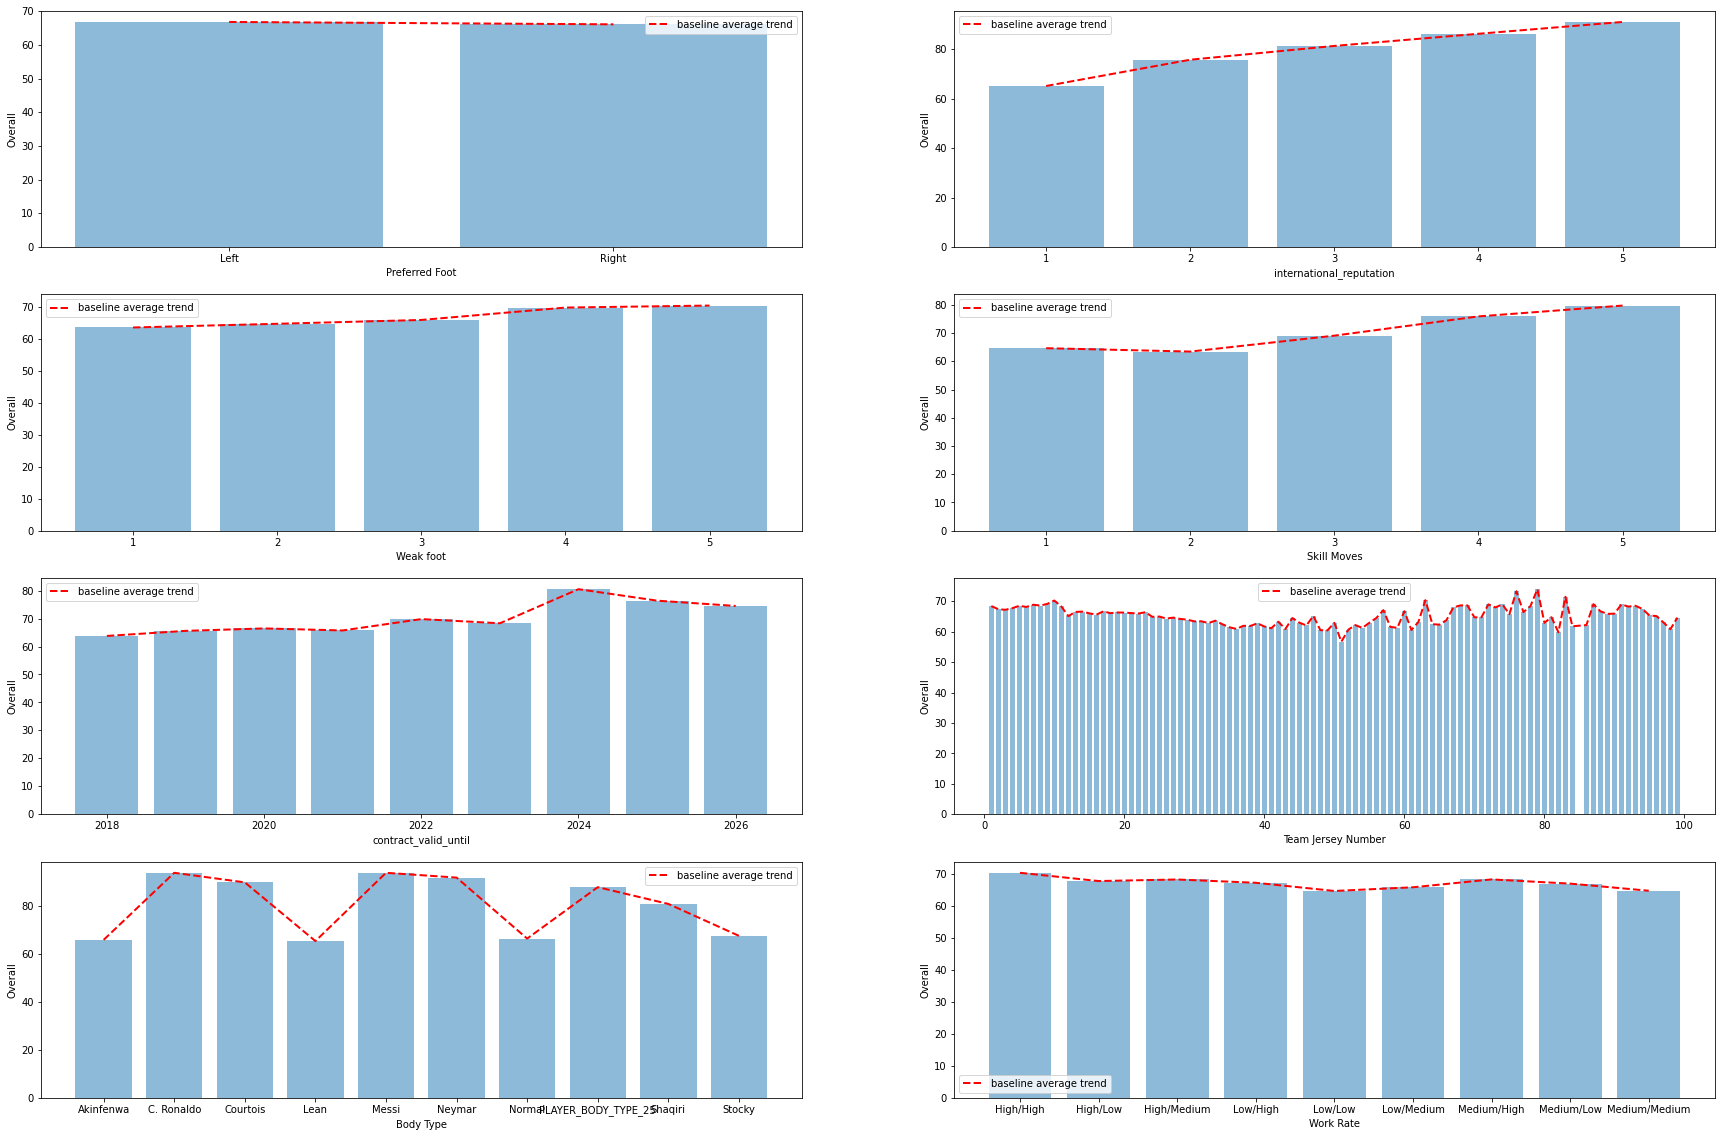

In [17]:
fig, ax = plt.subplots(4,2,figsize=(30,20))
ax =ax.ravel()

#Relationship with preffered foot
df_foot = df19[["preferred_foot", "overall"]].groupby(by="preferred_foot").mean()
ax[0].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[0].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[0].set_xlabel('Preferred Foot')
ax[0].set_ylabel('Overall')
ax[0].legend(frameon=True, loc='topleft')

#Relationship with international reputation
df_foot = df19[["international_reputation", "overall"]].groupby(by="international_reputation").mean()
ax[1].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[1].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[1].set_xlabel('international_reputation')
ax[1].set_ylabel('Overall')
ax[1].legend(frameon=True, loc='topleft')

#Relationship with weak foot
df_foot = df19[["weak_foot", "overall"]].groupby(by="weak_foot").mean()
ax[2].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[2].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[2].set_xlabel('Weak foot')
ax[2].set_ylabel('Overall')
ax[2].legend(frameon=True, loc='topleft')

#Relationship with skill moves
df_foot = df19[["skill_moves", "overall"]].groupby(by="skill_moves").mean()
ax[3].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[3].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[3].set_xlabel('Skill Moves')
ax[3].set_ylabel('Overall')
ax[3].legend(frameon=True, loc='topleft')

#Relationship with contract_valid_until
df_foot = df19[["contract_valid_until", "overall"]].groupby(by="contract_valid_until").mean()
ax[4].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[4].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[4].set_xlabel('contract_valid_until')
ax[4].set_ylabel('Overall')
ax[4].legend(frameon=True, loc='topleft')

#Relationship with team jersey number
df_foot = df19[["team_jersey_number", "overall"]].groupby(by="team_jersey_number").mean()
ax[5].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[5].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[5].set_xlabel('Team Jersey Number')
ax[5].set_ylabel('Overall')
ax[5].legend(frameon=True, loc='topleft')


#Relationship with body type
df_foot = df19[["body_type", "overall"]].groupby(by="body_type").mean()
ax[6].plot(df_foot.index,df_foot, 'r--', linewidth=2, label='baseline average trend')
ax[6].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[6].set_xlabel('Body Type')
ax[6].set_ylabel('Overall')
ax[6].legend(frameon=True, loc='topleft')


#Relationship with work_rate
df_foot = df19[["work_rate", "overall"]].groupby(by="work_rate").mean()
ax[7].plot(df_foot.index,df_foot, 'r--', linewidth=2, label='baseline average trend')
ax[7].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[7].set_xlabel('Work Rate')
ax[7].set_ylabel('Overall')
ax[7].legend(frameon=True, loc='topleft')



<BarContainer object of 17770 artists>

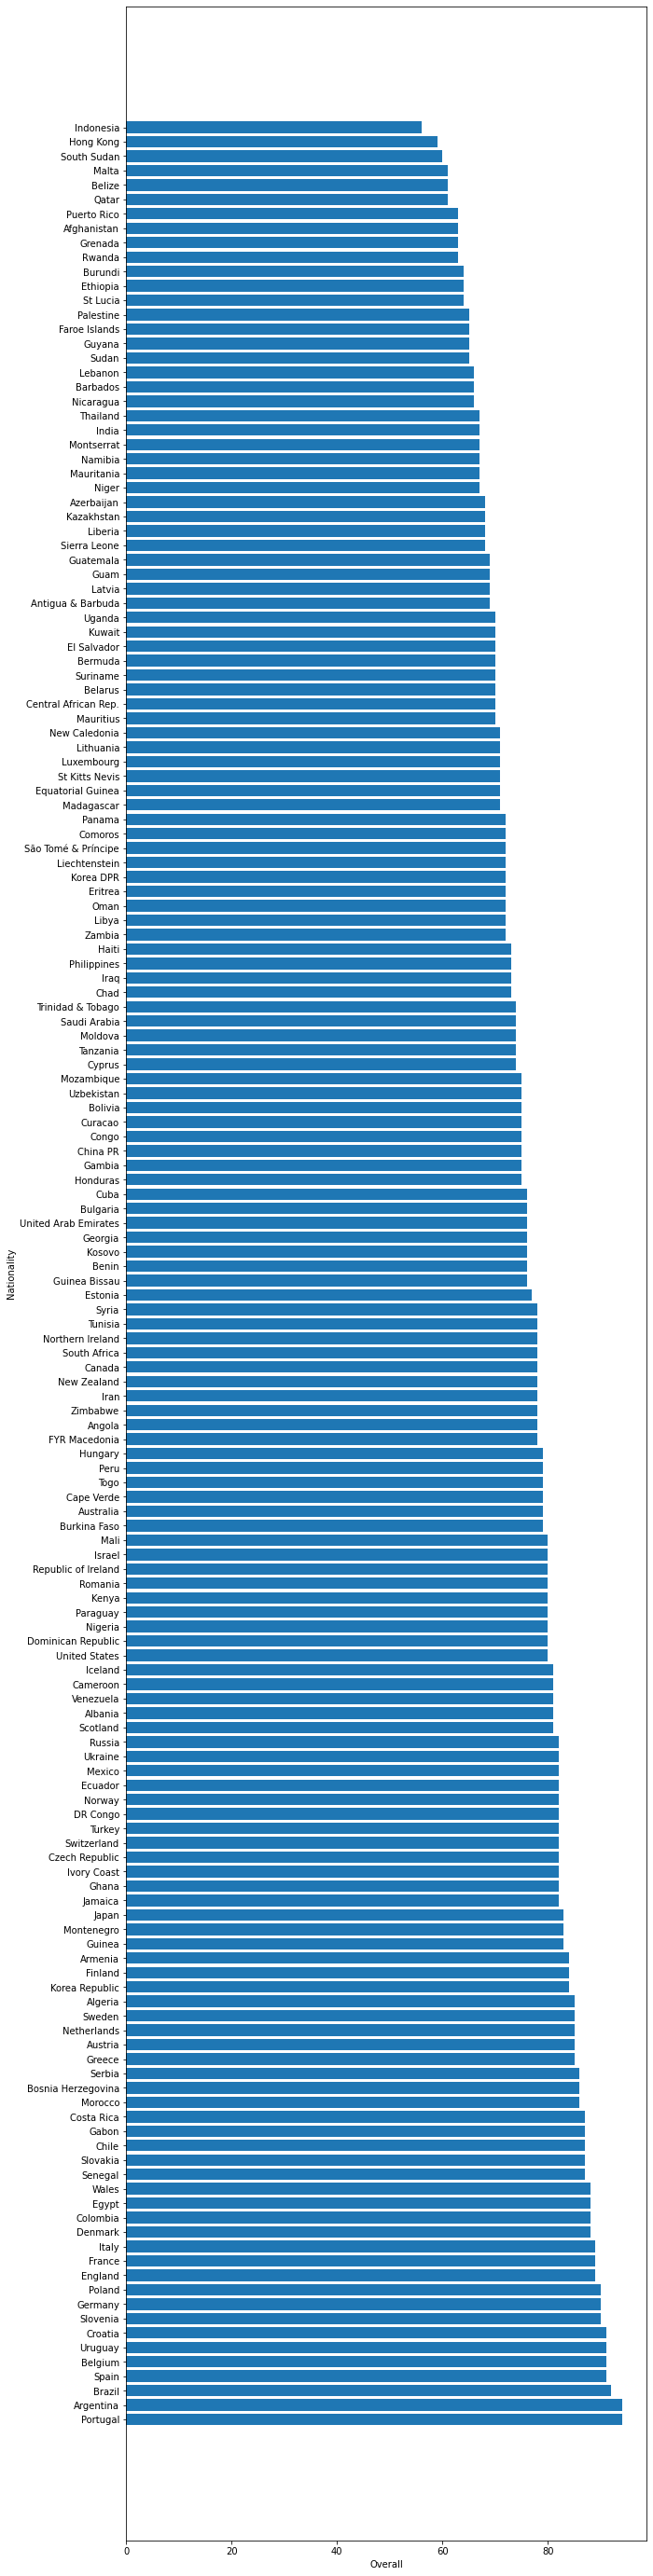

In [18]:
#Relationship with nationality
fig, ax = plt.subplots(figsize=(10,50))
ax.set_xlabel('Overall')
ax.set_ylabel('Nationality')
ax.barh(df19["nationality"],df19['overall'] )

Out of all categorical feature columns, following shows some relationship trend with the overall response variable:

1. Nationality
2. International Reputation
3. Weak Foot
4. Skill Moves
5. Contract Valid Until
6. Body Type
7. Work Rate

where, there is need to one-hot encode columns like Nationality, Contract Valid Until, Body Type and Work Rate

Selected Feature columns based on the EDA done in previous sections are following:

1.   Age
2.   Value_eur
3.   Wage_eur
4.   Release_clause_eur
5.   International Reputation
6.   Weak Foot
7.   Skill Moves
8.   Contract Valid Until
9.   Nationality
10.  Body Type
11.  Work Rate
12.  skill_curve
13.  skill_long_passing
14.  skill_ball_control
15.  movement_reactions
16.  power_shot_power
17.  power_long_shots
18.  mentality_aggression
19.  mentality_vision
20.  mentality_composure
21.  attacking_short_passing
22.  Team position

*We have not taken $club$ as a predictor since in the test set we are asked to take players from specific clubs only, so it does not make sense to choose this as a predictor during training*



In [9]:
# For training set

df19_new = df19[["age","value_eur","wage_eur","release_clause_eur","international_reputation","weak_foot","skill_moves",\
                 "work_rate","contract_valid_until","nationality","body_type",\
                 "skill_curve","skill_long_passing","skill_ball_control","movement_reactions","power_shot_power",\
                 "power_long_shots","mentality_aggression","mentality_vision","mentality_composure", "attacking_short_passing","team_position", "overall"]]
cat_features = ["body_type", "team_position", "nationality", "contract_valid_until","work_rate"]


for key in cat_features:
      if key!='team_position':
        temp_col = pd.get_dummies(df19_new[key])
        df19_new.drop(key,axis=1, inplace=True)
        df19_new = pd.concat([df19_new, temp_col], axis=1)
      else:
        temp_col = pd.get_dummies(df19_new[key], prefix='t')
        df19_new.drop(key,axis=1, inplace=True)
        df19_new = pd.concat([df19_new, temp_col], axis=1)

#Filling null values with zero
df19_new["release_clause_eur"].fillna(0.0, inplace=True)
df19_new.head()

,age,value_eur,wage_eur,release_clause_eur,international_reputation,weak_foot,skill_moves,skill_curve,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,power_long_shots,mentality_aggression,mentality_vision,mentality_composure,attacking_short_passing,overall,Akinfenwa,C. Ronaldo,Courtois,Lean,Messi,Neymar,Normal,PLAYER_BODY_TYPE_25,Shaqiri,Stocky,t_CAM,t_CB,t_CDM,t_CF,t_CM,t_GK,t_LAM,t_LB,t_LCB,t_LCM,t_LDM,t_LF,t_LM,t_LS,t_LW,t_LWB,t_RAM,t_RB,t_RCB,t_RCM,t_RDM,t_RES,t_RF,t_RM,t_RS,t_RW,t_RWB,t_ST,t_SUB,Afghanistan,Albania,Algeria,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,2026.0,High/High,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,33,77000000,405000,127100000.0,5,4,5,81.0,77.0,94.0,96.0,95.0,93.0,63.0,82.0,95.0,81.0,94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,31,110500000,565000,226500000.0,5,4,4,93.0,87.0,96.0,95.0,85.0,94.0,48.0,94.0,96.0,90.0,94,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,26,118500000,290000,228100000.0,5,5,5,88.0,78.0,95.0,94.0,80.0,82.0,56.0,87.0,94.0,84.0,92,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,27,72000000,260000,138600000.0,4,3,1,21.0,51.0,42.0,90.0,31.0,12.0,38.0,68.0,68.0,50.0,91,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

For testing set, we are asked to take players from these specific clubs only:

1. FC Barcelona

2. FC Bayern München

3. Real Madrid 

4. Paris Saint-Germain

5. Juventus

6. Manchester City

7. Liverpool FC

In [10]:
#Filtering dataframe based on club values
df20_new = df20.loc[df20['club'].isin(["FC Barcelona","FC Bayern München","Real Madrid","Paris Saint-Germain","Juventus","Manchester City","Liverpool FC"])]
df20_new.reset_index(inplace=True)
df20_new.head()

,index,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
4,5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, C

In [11]:

df20_new = df20_new[["age","value_eur","wage_eur","release_clause_eur","international_reputation","weak_foot","skill_moves",\
                 "work_rate","contract_valid_until","nationality","body_type",\
                 "skill_curve","skill_long_passing","skill_ball_control","movement_reactions","power_shot_power",\
                 "power_long_shots","mentality_aggression","mentality_vision","mentality_composure", "attacking_short_passing","team_position","player_positions", "overall"]]

In [12]:
#Checking data types of all selected feature columns
df20_new.dtypes

age                           int64
value_eur                     int64
wage_eur                      int64
release_clause_eur          float64
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
contract_valid_until        float64
nationality                  object
body_type                    object
skill_curve                   int64
skill_long_passing            int64
skill_ball_control            int64
movement_reactions            int64
power_shot_power              int64
power_long_shots              int64
mentality_aggression          int64
mentality_vision              int64
mentality_composure           int64
attacking_short_passing       int64
team_position                object
player_positions             object
overall                       int64
dtype: object

From the above step, we found out that work_rate, nationality, body_type and team_position  are categorical variables, same as players19 dataset

In [23]:
#Checking null values count
df20_new.isnull().sum()

age                         0
value_eur                   0
wage_eur                    0
release_clause_eur          3
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
contract_valid_until        0
nationality                 0
body_type                   0
skill_curve                 0
skill_long_passing          0
skill_ball_control          0
movement_reactions          0
power_shot_power            0
power_long_shots            0
mentality_aggression        0
mentality_vision            0
mentality_composure         0
attacking_short_passing     0
team_position               0
player_positions            0
overall                     0
dtype: int64

The release_clause_eur column needs to be filled with zero values for NA

In [13]:
#Filling null values with zero
df20_new["release_clause_eur"].fillna(0.0, inplace=True)

In [14]:
# Encoding player position column

# Code to get unique positions in the column
pos=[];
for j in range(len(df20_new)):
    
     val = df20_new["player_positions"].values[j]
     #Checking whether the string has '+'sign between numbers and add them accordingly
     if (val.count(',')>=1): 
      ct = val.count(',')
      for k in range(ct):
          str_ = val.split(",")[k]
          pos.append(str_.strip())
     else:
          str_ = val
          pos.append(str_)
pos=list(set(pos))

#Creating a dataframe with columns equal to number of unique positions
df = pd.DataFrame(columns=pos)

In [15]:
# Keeping a count of multiple positions for different players

for j in range(len(df20_new)):
     val = df20_new["player_positions"].values[j]  
     
     #Checking whether the string has ','sign between numbers and add them accordingly
     if (val.count(',')>=1): 
      ct = val.count(',')
      for k in range(ct):
          
          str_ = val.split(",")[k].strip()
          if str_ in pos:
            df.loc[j,str_]=1
          else: 
            df.loc[j,str_]=0
          
     else:
       if val in pos:
         df.loc[j,val]=1 
       else:
         df.loc[j,val]=0 

In [16]:
# Filling the na values with 0
df.fillna(0, inplace=True) 


 #Concatenating player positions dataframe with the original one
df20_new = pd.concat([df20_new, df], axis=1)
# Dropping player position column 
df20_new.drop(columns=["player_positions"], inplace=True)
df20_new.head()

,age,value_eur,wage_eur,release_clause_eur,international_reputation,weak_foot,skill_moves,work_rate,contract_valid_until,nationality,body_type,skill_curve,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,power_long_shots,mentality_aggression,mentality_vision,mentality_composure,attacking_short_passing,team_position,overall,CB,LB,ST,GK,CF,RB,CDM,RWB,LW,LM,RM,RW,CAM,CM
0,32,95500000,565000,195800000.0,5,4,4,Medium/Low,2021.0,Argentina,Messi,93,92,96,95,86,94,48,94,96,92,RW,94,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,34,58500000,405000,96500000.0,5,4,5,High/Low,2022.0,Portugal,C. Ronaldo,81,77,92,96,95,93,63,82,95,83,LW,93,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,27,105500000,290000,195200000.0,5,5,5,High/Medium,2022.0,Brazil,Neymar,88,81,95,92,80,84,51,90,94,87,CAM,92,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,28,90000000,470000,184500000.0,4,4,4,High/Medium,2024.0,Belgium,Normal,83,83,94,90,82,80,54,89,91,89,LW,91,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,90000000,370000,166500000.0,4,5,4,High/High,2023.0,Belgium,Normal,85,91,91,91,91,90,76,94,91,92,RCM,91,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
# For testing set

cat_features = ["body_type", "team_position", "nationality", "contract_valid_until","work_rate"]

# One-hot encoding categorical columns
for key in cat_features:
      if key != 'team_position':
        temp_col = pd.get_dummies(df20_new[key])
        df20_new.drop(key,axis=1, inplace=True)
        df20_new = pd.concat([df20_new, temp_col], axis=1)
      else:
        
        temp_col = pd.get_dummies(df20_new[key], prefix='t')
        df20_new.drop(key,axis=1, inplace=True)
        df20_new = pd.concat([df20_new, temp_col], axis=1)

df20_new.head()

,age,value_eur,wage_eur,release_clause_eur,international_reputation,weak_foot,skill_moves,skill_curve,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,power_long_shots,mentality_aggression,mentality_vision,mentality_composure,attacking_short_passing,overall,CB,LB,ST,GK,CF,RB,CDM,RWB,LW,LM,RM,RW,CAM,CM,C. Ronaldo,Courtois,Lean,Messi,Neymar,Normal,Stocky,t_CAM,t_CDM,t_CF,t_GK,t_LB,t_LCB,t_LCM,t_LW,t_RB,t_RCB,t_RCM,t_RES,t_RW,t_ST,t_SUB,Algeria,Argentina,Austria,Belgium,Bosnia Herzegovina,Brazil,Cameroon,Canada,Chile,Colombia,Costa Rica,Croatia,Dominican Republic,England,France,Germany,Ghana,Italy,Japan,Netherlands,Poland,Portugal,Republic of Ireland,Senegal,Serbia,Spain,Switzerland,Turkey,Ukraine,Uruguay,Wales,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0,High/High,High/Low,High/Medium,Low/High,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,32,95500000,565000,195800000.0,5,4,4,93,92,96,95,86,94,48,94,96,92,94,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,34,58500000,405000,96500000.0,5,4,5,81,77,92,96,95,93,63,82,95,83,93,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,27,105500000,290000,195200000.0,5,5,5,88,81,95,92,80,84,51,90,94,87,92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,28,90000000,470000,184500000.0,4,4,4,83,83,94,90,82,80,54,89,91,89,91,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,28,90000000,370000,166500000.0,4,5,4,85,91,91,91,91,90,76,94,91,92,91,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


After one-hot encoding, there must be columns that might not be present in both the datasets, so we are taking intersection of columns present in the datasets. We will be using these common feature columns for training and prediction

In [18]:
#Number of intersecting columns
cols = list(set(df19_new.columns).intersection(set(df20_new.columns)))

In [19]:
#Preparing training and testing dataset
df19_proc =df19_new[[i for i in cols]].copy()
df20_proc =df20_new[[i for i in cols]].copy()

x_train = df19_proc.drop(["overall"],axis=1)
y_train = df19_proc["overall"]

x_test = df20_proc.drop(["overall"],axis=1)
y_test = df20_proc["overall"]

In [25]:
# Base Model
lreg = LinearRegression()

    # Fit the linear model on the train data
lreg.fit(x_train,y_train)
    
    # Predict the response variable for the test set using the trained model
y_pred= lreg.predict(x_test)
    
    # Compute the MSE for the test data
MSE = mean_squared_error(y_test, y_pred)
    
    # Append the computed MSE to the list
print(f'The mean squared error using Linear Regression is {MSE:.4f}')

The mean squared error using Linear Regression is 21.7322


In [34]:
# Ranking based on overall skill

In [21]:
df20_rank = df20[["long_name"]].copy()
df20_rank["rank"] = pd.Series(y_pred).rank()
df20_rank.sort_values("rank", inplace = True)
df20_rank.head(10)

,long_name,rank
185,Wilfried Zaha,1.0
186,Francisco Alcácer García,2.0
181,Jordan Pickford,3.0
187,Álvaro Borja Morata Martín,4.0
182,Yannick Ferreira Carrasco,5.0
183,Borja Iglesias Quintas,6.0
172,John Stones,7.0
184,Koen Casteels,8.0
179,Lucas Digne,9.0
178,Marco Asensio Willemsen,10.0


Text(0.5, 0, 'Players')

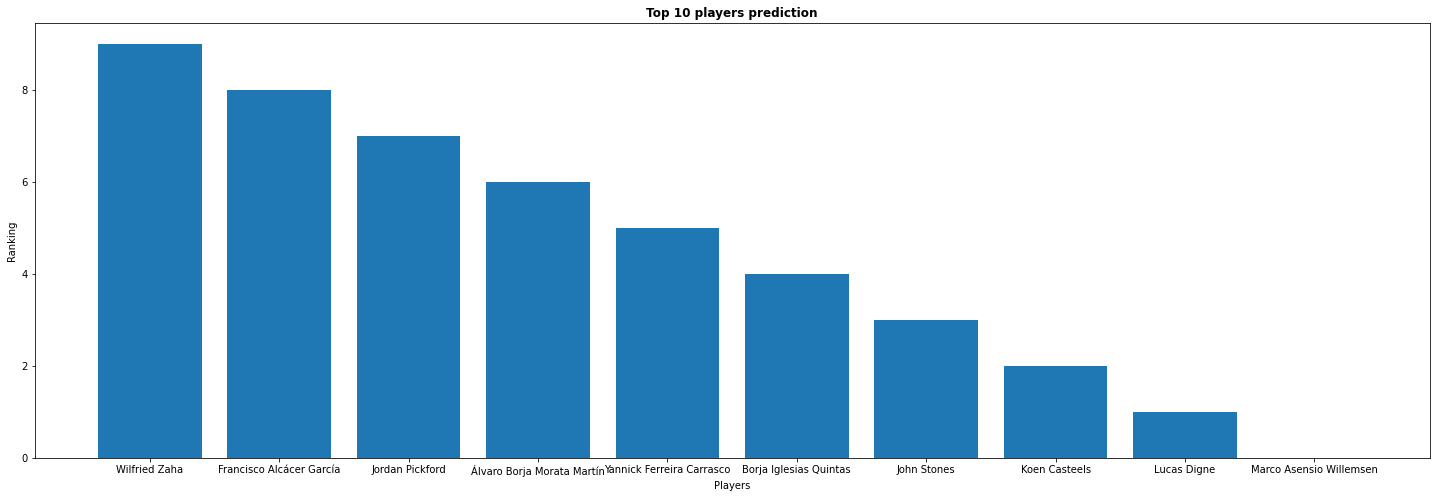

In [22]:
fig,ax = plt.subplots(figsize=(25,8))
ax.bar(df20_rank["long_name"].iloc[:10], 10-df20_rank["rank"].iloc[:10])
ax.set_title("Top 10 players prediction", fontweight='bold')
ax.set_ylabel("Ranking")
ax.set_xlabel("Players")

The mean squared error using Decision Tree Regressor is 0.9114
The mean squared error using Random Forest Regressor is 0.6137


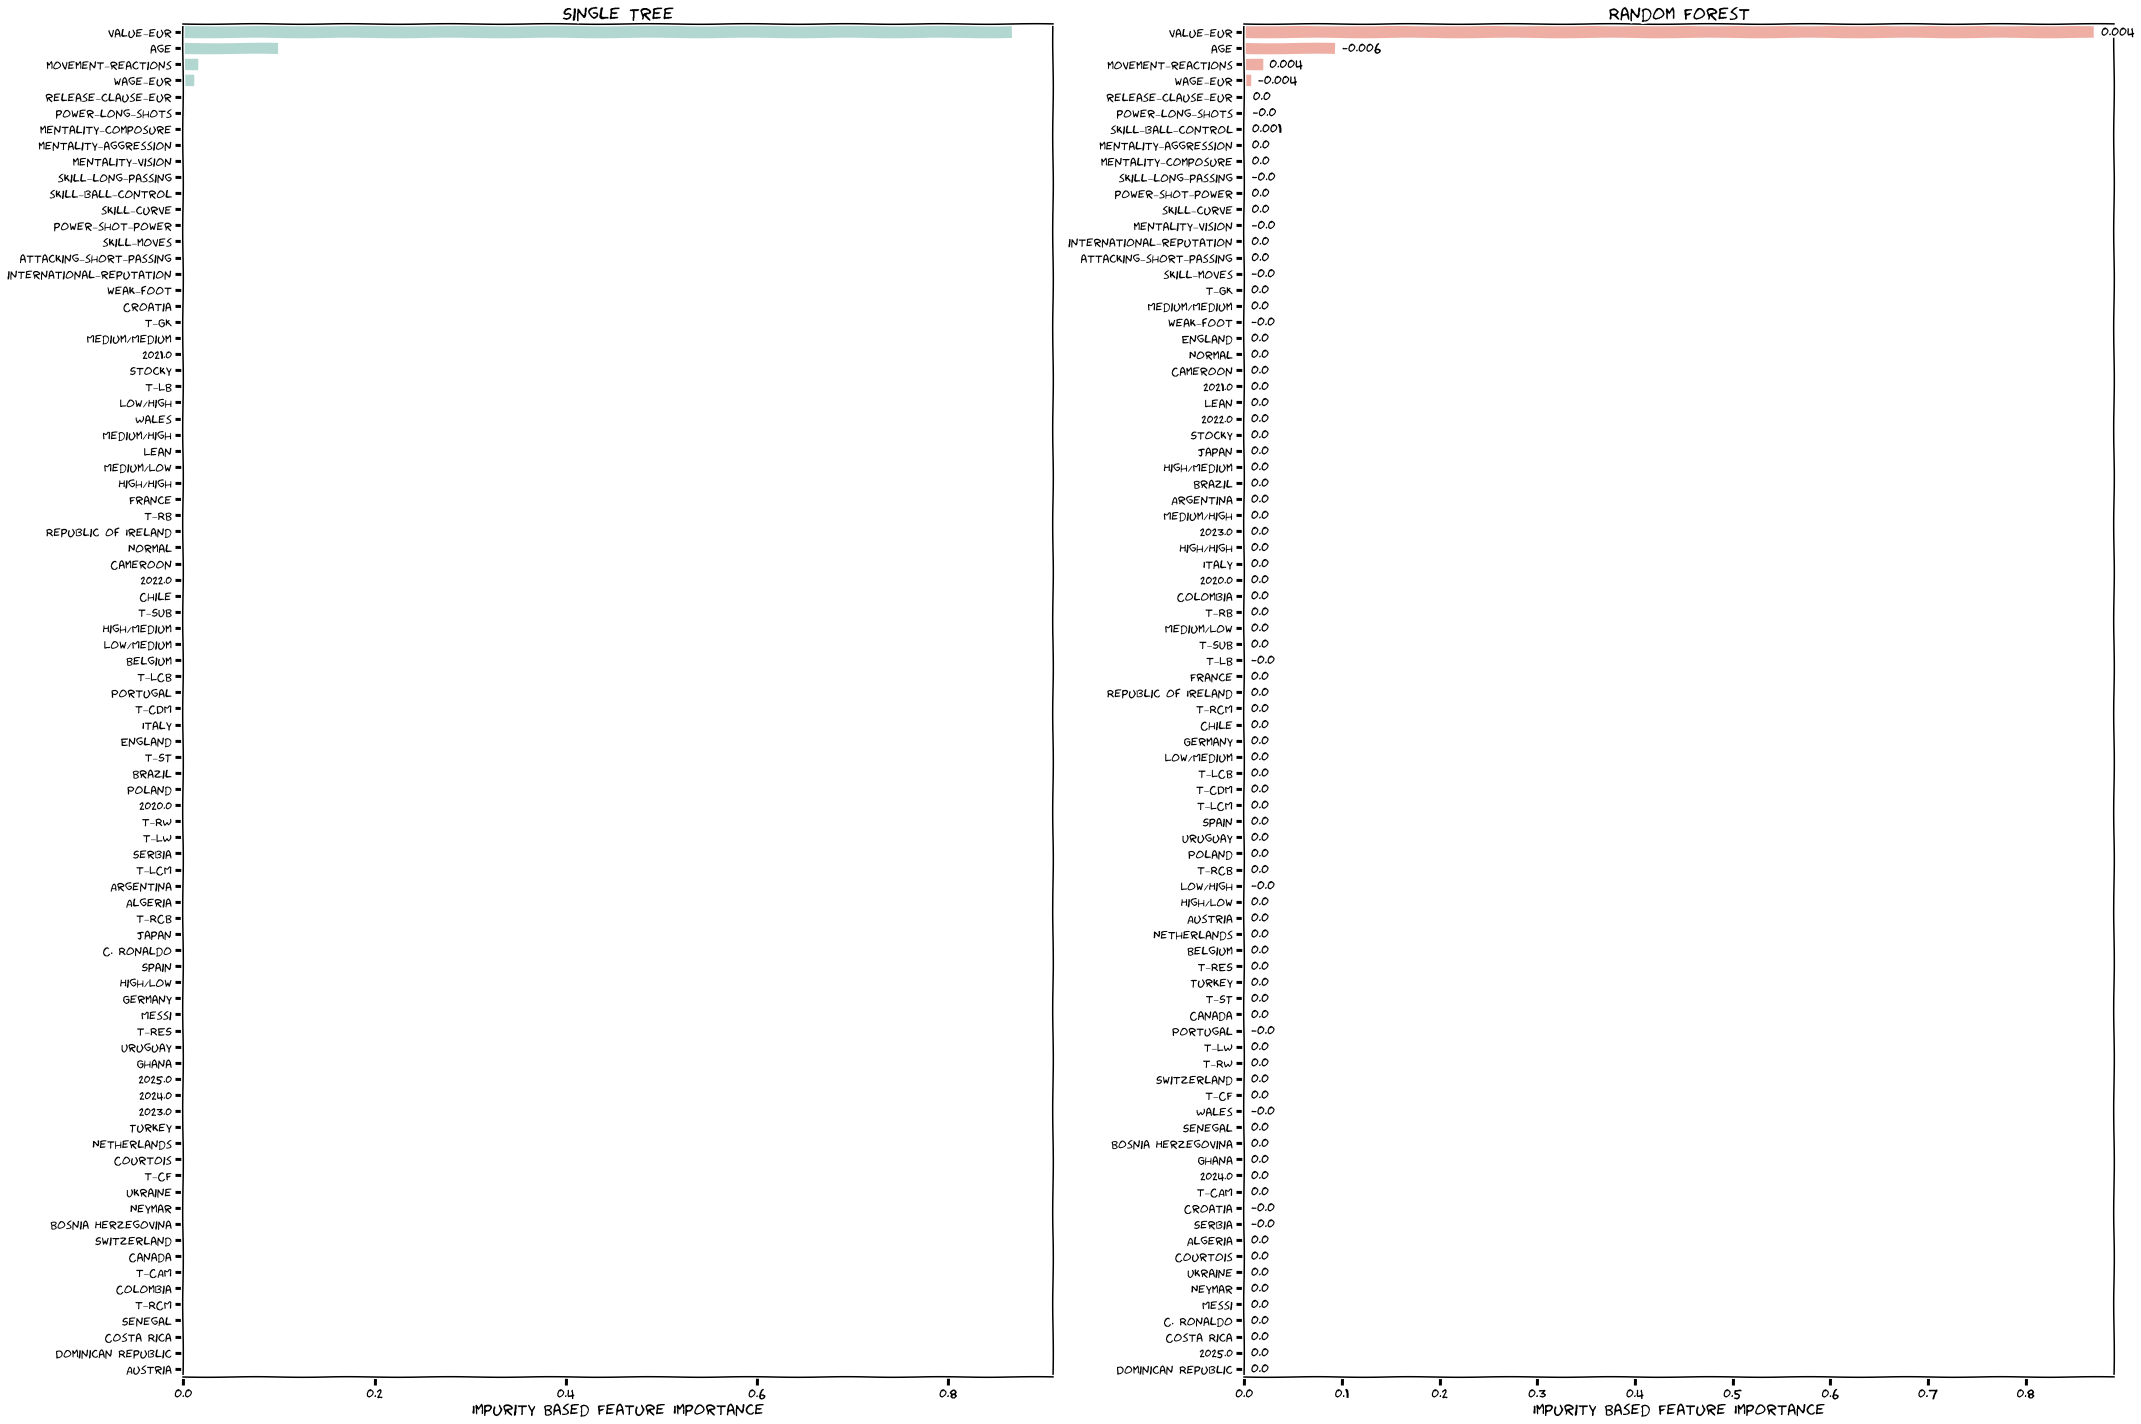

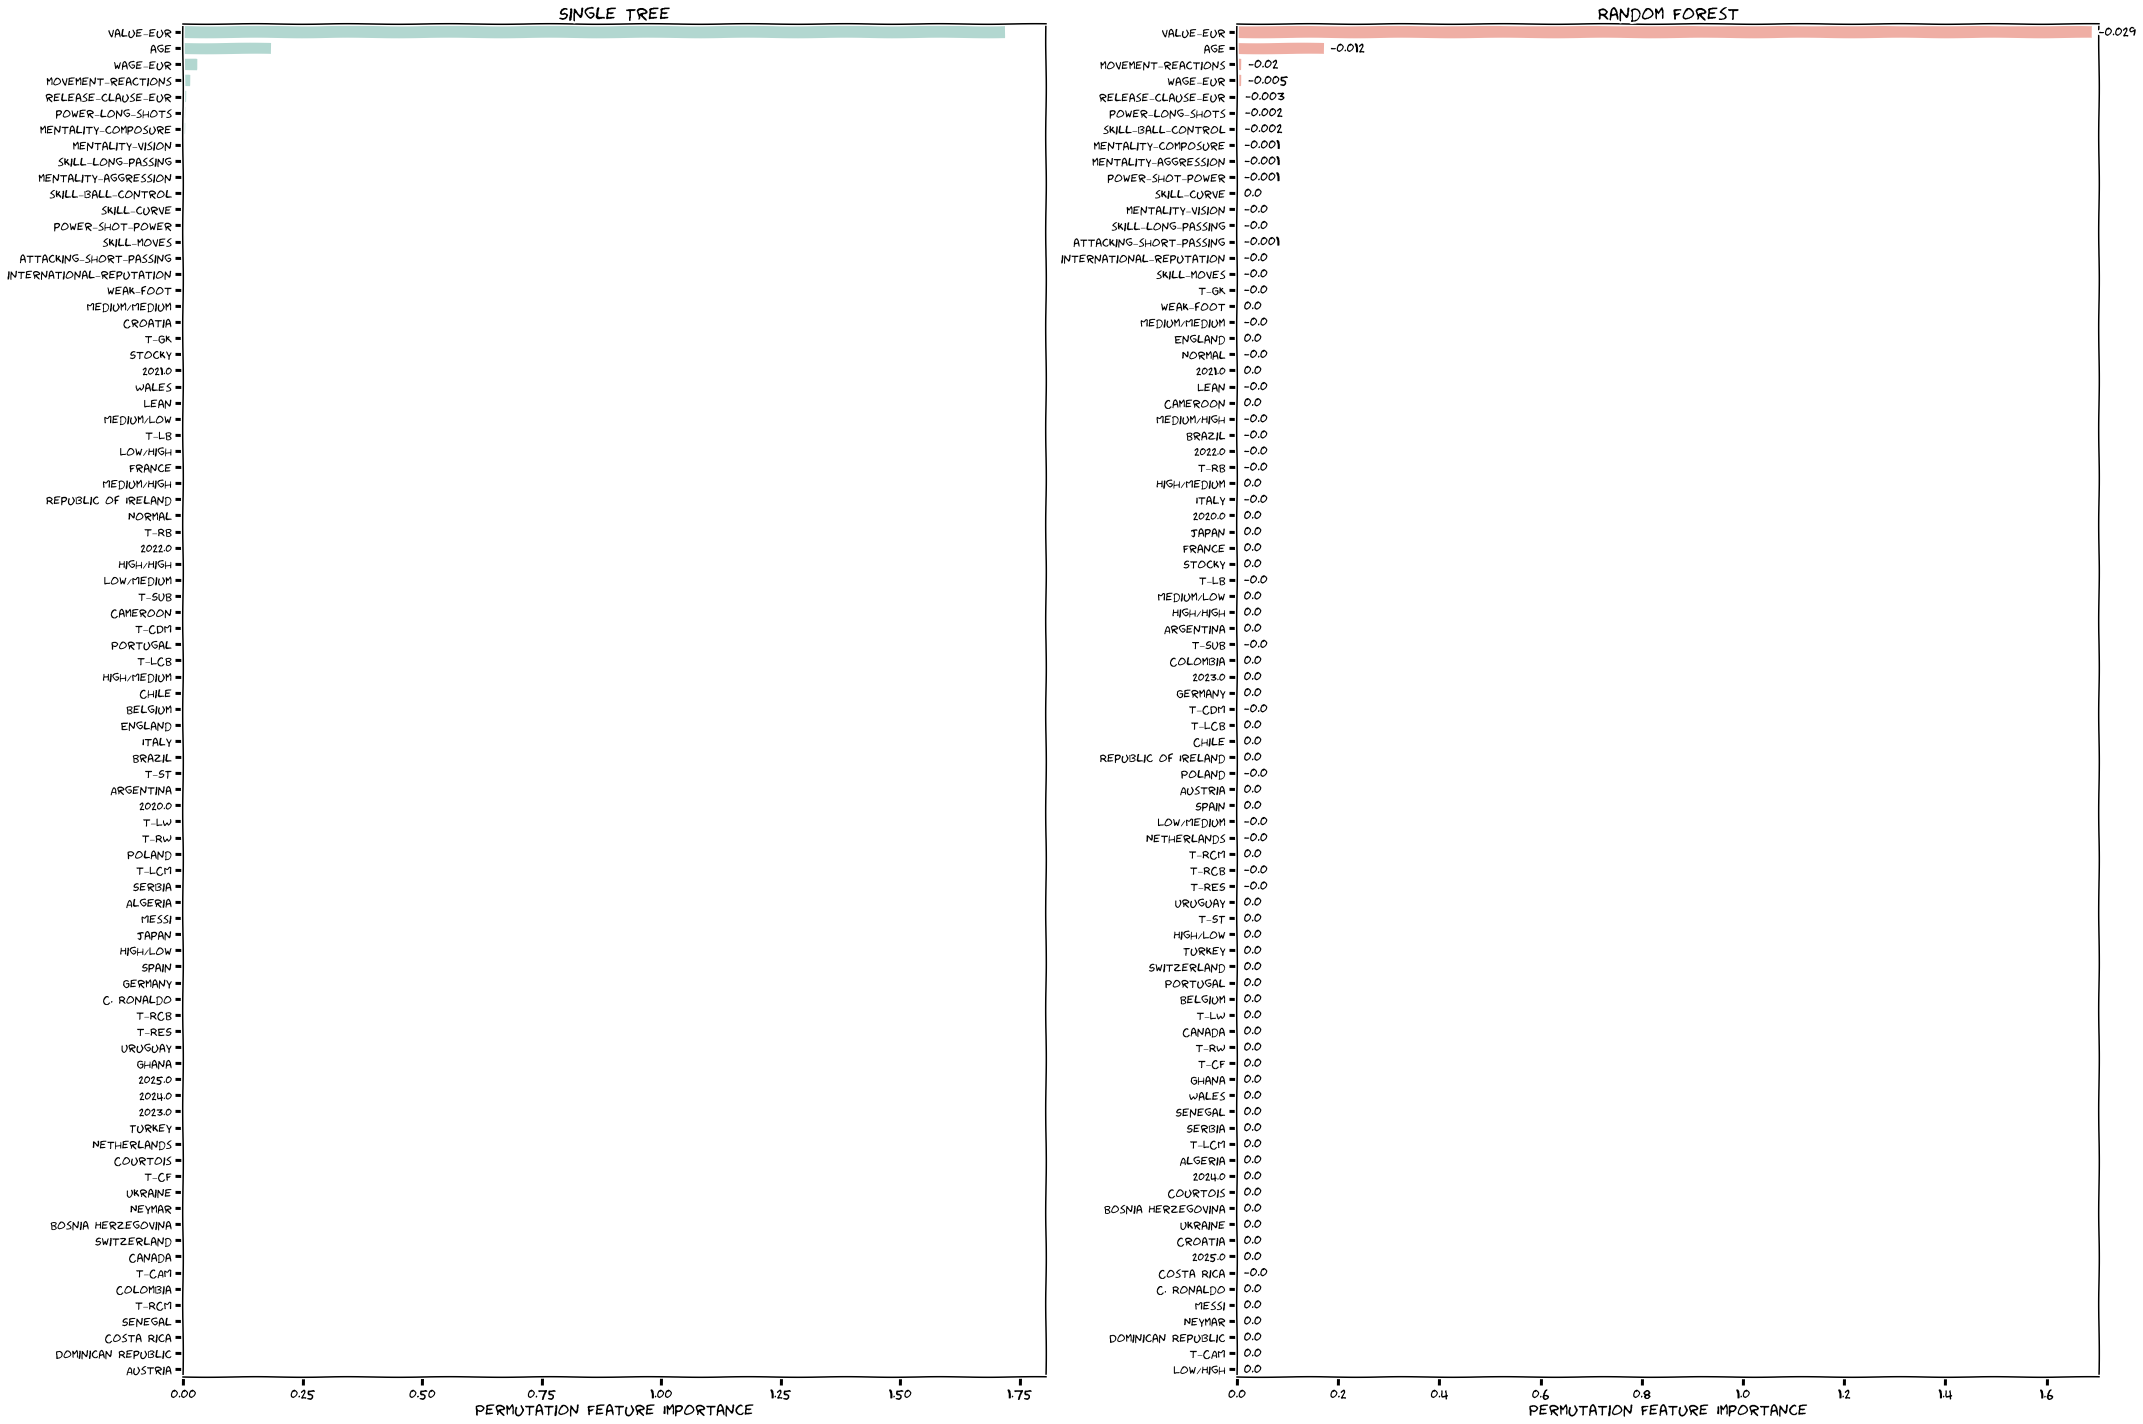

In [26]:


# Define a Random Forest classifier with random_state as the above defined variable
# Set the maximum depth to be max_depth and use 10 estimators
random_state=101
max_depth=10

# Set the maximum depth to be max_depth
tree = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)

# Fit the model on the entire data
tree.fit(x_train, y_train);

y_pred_tree= tree.predict(x_test)
mse = mean_squared_error(y_test, y_pred_tree)
print(f'The mean squared error using Decision Tree Regressor is {mse:.4f}')
# Using Permutation Importance to get the importance of features for the Decision Tree 
# with random_state as the above defined variable
tree_result = permutation_importance(tree, x_train, y_train, random_state=random_state)
forest = RandomForestRegressor(random_state=random_state, n_estimators=10, max_depth=max_depth)

# Fit the model on the entire data
forest.fit(x_train, y_train);
y_pred_forest= forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred_forest)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')
# Use Permutation Importance to get the importance of features for the Random Forest model 
# with random_state as the above defined variable
forest_result = permutation_importance(forest, x_train, y_train, random_state=random_state)
plot_feature_importance(tree,forest,x_train,y_train);

# # Helper code to visualize the feature importance using 'permutation feature importance'
plot_permute_importance(tree_result,forest_result,x_train,y_train);

According to the impurity based feature importance and permutation based feature importance, we get following relevant features for deciding the ranking of the features:
1. Value_eur
2. Wage_eur
3. Age
4. Movement_reactions

Let us again train the models on these features

In [33]:


# Define a Random Forest classifier with random_state as the above defined variable
# Set the maximum depth to be max_depth and use 10 estimators
random_state=101
max_depth=10

# Set the maximum depth to be max_depth
tree = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)

# Fit the model on the entire data
tree.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train);

y_pred_tree= tree.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_tree)
print(f'The mean squared error using Decision Tree Regressor is {mse:.4f}')
# Using Permutation Importance to get the importance of features for the Decision Tree 
# with random_state as the above defined variable
# tree_result = permutation_importance(tree, x_train, y_train, random_state=random_state)
forest = RandomForestRegressor(random_state=random_state, n_estimators=10, max_depth=max_depth)

# Fit the model on the entire data
forest.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train);
y_pred_forest= forest.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_forest)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')
# Use Permutation Importance to get the importance of features for the Random Forest model 
# with random_state as the above defined variable
# forest_result = permutation_importance(forest, x_train, y_train, random_state=random_state)
# plot_feature_importance(tree,forest,x_train,y_train);

# # Helper code to visualize the feature importance using 'permutation feature importance'
# plot_permute_importance(tree_result,forest_result,x_train,y_train);

The mean squared error using Decision Tree Regressor is 0.8420
The mean squared error using Random Forest Regressor is 0.6211


So we observe no significant change in the MSE values after keeping only 4 columns as predictors

In [35]:
#Ranking based on Decision Tree

df20_rank = df20[["long_name"]].copy()
df20_rank["rank"] = pd.Series(y_pred_tree).rank()
df20_rank.sort_values("rank", inplace = True)
df20_rank.head(10)

,long_name,rank
186,Francisco Alcácer García,1.0
187,Álvaro Borja Morata Martín,2.0
185,Wilfried Zaha,3.0
183,Borja Iglesias Quintas,4.5
181,Jordan Pickford,4.5
184,Koen Casteels,6.5
182,Yannick Ferreira Carrasco,6.5
179,Lucas Digne,8.0
176,Thomas Lemar,9.0
180,Julian Draxler,10.0


Text(0.5, 0, 'Players')

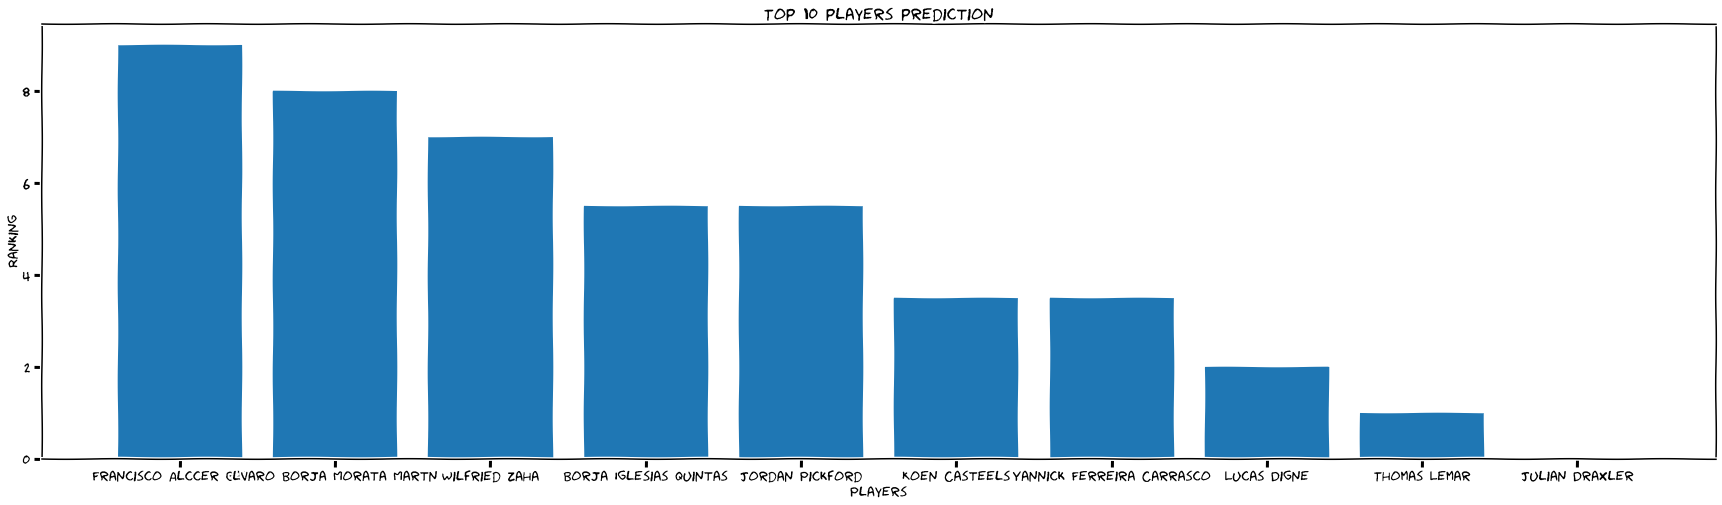

In [42]:
fig,ax = plt.subplots(figsize=(30,8))
ax.bar(df20_rank["long_name"].iloc[:10], 10-df20_rank["rank"].iloc[:10])
ax.set_title("Top 10 players prediction", fontweight='bold')
ax.set_ylabel("Ranking", fontweight='bold')
ax.set_xlabel("Players", fontweight='bold')

In [40]:
l_rate = 0.05

# Initialise a Boosting model using sklearn's boosting model 
# Use 1000 estimators, depth of 1 and learning rate as defined above
boosted_model  = GradientBoostingRegressor(n_estimators=100, max_depth=1, learning_rate = l_rate)
# Fit on the train data
boosted_model.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train)

# Predict on the test data
y_pred = boosted_model.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
y_pred_boost= tree.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_boost)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')

The mean squared error using Random Forest Regressor is 0.8420


In [41]:
# Specify the number of bootstraps
num_bootstraps = 30

# Specify the maximum depth of the decision tree
max_depth = 10

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
# Set max_samples as .8 and random_state as 3
model = BaggingRegressor(DecisionTreeRegressor(max_depth=max_depth), n_estimators=num_bootstraps,max_samples=0.8, random_state=3 )
                        

# Fit the model on the train data
model.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train)
y_pred_bag= tree.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_bag)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')

The mean squared error using Random Forest Regressor is 0.8420
